# Convex Hull
Author: Alejandro Antonio Espinosa Gil

In [8]:
# Libraries
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [11]:
# Generating random points bewtween 0 and 100
points = 100*np.random.rand(60, 2)

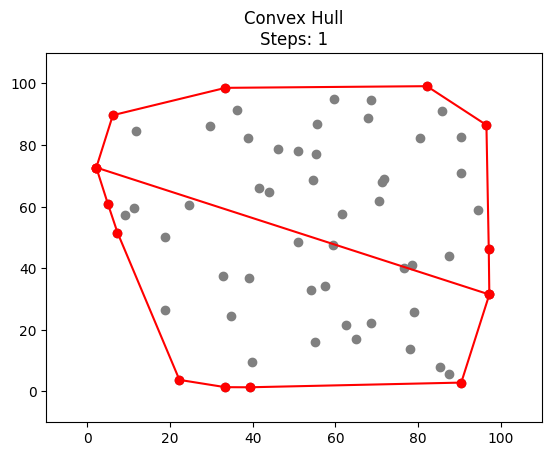

In [12]:

def separar(vector):
    x=np.zeros(len(vector))
    y=np.zeros(len(vector))
    c = 0
    for i in vector:
        a = i
        x[c] = a[0]
        y[c] = a[1]
        c += 1
    return x,y

def update(frame):
    global L, U
    plt.cla()  # Clear the current figure.
    plt.scatter(points[:, 0], points[:, 1], color='gray')  # Scatter plot of points.
    
    # Add points to L
    if frame < len(sorted_points):
        while len(L) >= 2 and cross_prod(L[-2], L[-1], sorted_points[frame]) <= 0:
            L.pop()
        L.append(sorted_points[frame])
    
    # Add points to U
    if frame >= len(sorted_points):  # Asegúrate de comenzar a añadir a U solo después de haber terminado con L
        reverse_frame = frame - len(sorted_points)
        while len(U) >= 2 and cross_prod(U[-2], U[-1], sorted_points[::-1][reverse_frame]) <= 0:
            U.pop()
        U.append(sorted_points[::-1][reverse_frame])

    # Drawing L
    if len(L) > 1:
        xl, yl = separar(L)
        plt.plot(xl, yl, 'ro-')

    # Drawing U
    if len(U) > 1:
        xu, yu = separar(U)
        plt.plot(xu, yu, 'ro-')

    # Closing the shape if we are on the last frame
    if frame == len(sorted_points) * 2 - 1:
        # Completar el ciclo para cerrar la envolvente
        complete_hull = np.vstack((L, U[1:], L[0]))
        x_complete, y_complete = separar(complete_hull)
        plt.plot(x_complete, y_complete, 'go-')

    plt.xlim(-10, 110)
    plt.ylim(-10, 110)

    # Title
    plt.title(f"Convex Hull\nSteps: {frame + 1}")


# Initialize L and U
L = [] # Hold vertices of upper hull
U = [] # Hold vertices of lower hull

# Function to calculate cross product
def cross_prod(o, a, b):
    return (a[0] - o[0]) * (b[1] - o[1]) - (b[0] - o[0]) * (a[1] - o[1])

# Sorting random generated points
sorted_points = points[points[:, 0].argsort()]

# Setting the figure for the animation
fig, ax = plt.subplots()

# Inicialize de animation
ani = FuncAnimation(fig, update, frames=range(len(sorted_points) * 2), repeat=False)

# Saving the animation as a gif
from IPython.display import HTML
ani.save('animation.gif', writer='pillow')
HTML('<img src="animation.gif">')


#plt.show()

(-10.0, 110.0)

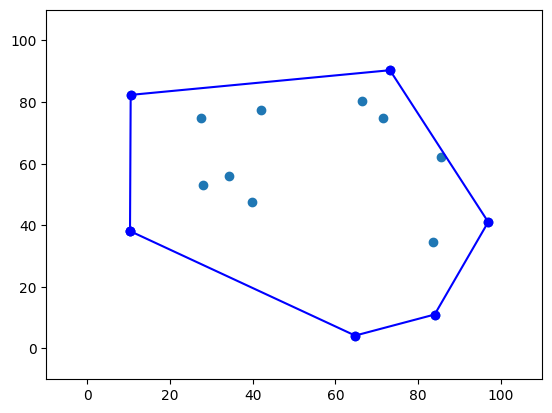

In [21]:
## Without Animation

def separar(vector):
    x=np.zeros(len(vector))
    y=np.zeros(len(vector))
    c = 0
    for i in vector:
        a = i
        x[c] = a[0]
        y[c] = a[1]
        c += 1
    return x,y


sorted_points = points[points[:,0].argsort()]
U = [] # Hold vertices of upper hull
L = [] # Hold vertices of lower hull

# The cross product is calculated according to a
# different point that it is not the origin

# Where o is the relative origin point
def cross_prod(o,a,b):
    return (a[0]-o[0])*(b[1]-o[1])-(b[0]-o[0])*(a[1]-o[1])

for i in sorted_points:
    while len(L) >= 2 and cross_prod(L[-2], L[-1], i) <= 0:
        L.pop()
    L.append(i)


for i in reversed(sorted_points):
    while len(U) >= 2 and cross_prod(U[-2], U[-1], i) <= 0:
        U.pop()
    U.append(i)


juan = L[:-1] + U


x,y = separar(juan)

# Plot Zone
plt.scatter(points[:,0],points[:,1])
plt.plot(x,y,'bo',linestyle="-")
#plt.scatter(leftmost_point[0],leftmost_point[1])
plt.xlim(-10,110)
plt.ylim(-10,110)

## Leftmost version

In [45]:
leftmost_point = points[np.argmin(points[:,0])]
print("Leftmost point: ",leftmost_point)

# Plot Zone
plt.scatter(points[:,0],points[:,1])
plt.scatter(leftmost_point[0],leftmost_point[1])
plt.xlim(-10,110)
plt.ylim(-10,110)

Leftmost point:  [ 0.88011658 22.37328951]


(-10.0, 110.0)